In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/seb/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Update log file
filename = 'demonstrations/seb_run000'
dati = np.load(filename+'.npz')

observation = dati['obs']
print(observation.shape)

obs_middle = np.array([15.0, 25.0, 0.0, 0.0, 0.0])
obs_radius = np.array([15.0, 25.0, np.pi, np.pi/2, np.pi])
obs = (observation - obs_middle) / obs_radius
print(obs.shape)

reward = np.copy(dati['rewards'])
print(reward.shape)

delta_yaw = observation[1:,2] - observation[:-1,2]
crossings = np.abs(delta_yaw) > np.pi 
delta_yaw[crossings] = -np.sign(delta_yaw[crossings])*(np.abs(delta_yaw[crossings]) - 2*np.pi)
reward[:-1][delta_yaw>0] = 0
print(reward.shape)

out = {
   'actions': dati['actions'],
   'rewards': reward,
   'episode_returns': dati['episode_returns'],
   'episode_starts': dati['episode_starts'],
   'obs': obs,
}
np.savez(filename+'.nrm.npz', **out)

(10650, 5)
(10650, 5)
(10650,)
(10650,)


In [25]:
filename = 'demonstrations/seb_run000.nrm'
traj_data = np.load(filename+'.npz', allow_pickle=True)


reset    = traj_data['episode_starts'][1:-1]
done     = traj_data['episode_starts'][2:][~reset]
obs      = np.copy(traj_data['obs'][:-2][~reset])
actions  = traj_data['actions'][:-2][~reset]
next_obs = np.copy(traj_data['obs'][1:-1][~reset])
rewards  = traj_data['rewards'][:-2][~reset]
#rewards  = np.reshape(rewards, [rewards.shape[0], 1]) # create unused second dimension

delta = next_obs - obs
delta[:,2:] = (delta[:,2:] + 1) % 2 - 1

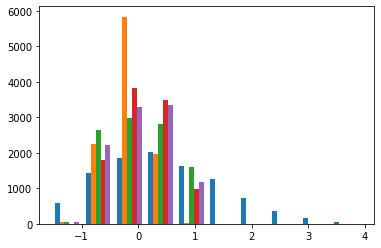

In [26]:
plt.hist(obs)
plt.show()

In [4]:
print("delta_mean= ", np.mean(delta, axis=0))
delta_std = np.std(delta, axis=0)
print("delta_std = ", delta_std)
rew_std = np.std(rewards, axis=0)
rew_mean = np.mean(rewards, axis=0)
print("rew_mean=", rew_mean)
print("rew_std=",rew_std)

delta_mean=  [-0.05159818 -0.00256441  0.00041537  0.05397467  0.00763356]
delta_std =  [0.27283235 0.09119003 0.14549804 0.14207232 0.1602701 ]
rew_mean= 6.745474201226178
rew_std= 16.7606318098354


In [5]:
true_delta_normed = delta/delta_std
true_rew_normed = (rewards - 7)/17

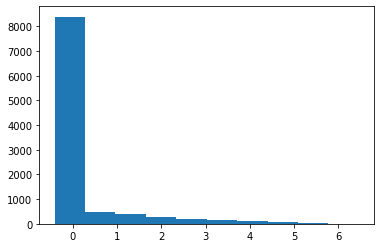

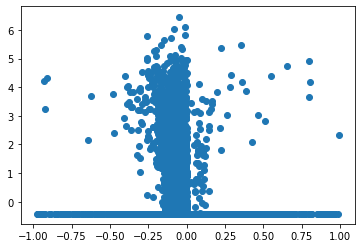

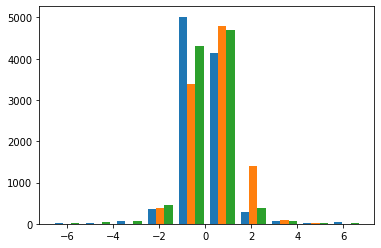

In [36]:
plt.hist(true_rew_normed)
plt.show()
plt.scatter(delta[:,2], true_rew_normed)
plt.show()
plt.hist(true_delta_normed[:, 2:])
plt.show()

In [7]:
X = np.hstack([obs, actions])

In [9]:
y = np.zeros([obs.shape[0],5+1+1])
y[:,:5] = true_delta_normed
y[:,5] = true_rew_normed
y[:,6] = done

In [10]:
print(np.mean(y, axis=0))
print(np.std(y, axis=0))
print(np.mean(X, axis=0))
print(np.std(X, axis=0))

[-0.18912046 -0.02812163  0.00285479  0.3799098   0.04762932 -0.01497211
  0.05667494]
[1.         1.         1.         1.         1.         0.98591952
 0.23122043]
[ 5.12344645e-01 -1.80302177e-01 -1.69204189e-04  3.11010285e-02
  1.63571420e-02 -1.45998629e-01  1.21817478e-02]
[1.04092536 0.32339147 0.56096065 0.45847718 0.51013567 0.48327372
 0.45444033]


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(256,256,256,256), 
                     activation='relu',
                     solver='adam', 
                     alpha=0.0001, 
                     batch_size='auto', 
                     learning_rate_init=0.001, 
                     max_iter=1000, shuffle=True, 
                     tol=0.0001, verbose=True, 
                     warm_start=False, momentum=0.9, 
                     nesterovs_momentum=True, early_stopping=True, 
                     validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                     epsilon=1e-08, n_iter_no_change=10, max_fun=15000,
                   )
regr = regr.fit(X_train, y_train)

Iteration 1, loss = 0.28913227
Validation score: 0.482241
Iteration 2, loss = 0.19155527
Validation score: 0.571807
Iteration 3, loss = 0.15735182
Validation score: 0.621402
Iteration 4, loss = 0.14001159
Validation score: 0.641340
Iteration 5, loss = 0.12761895
Validation score: 0.675088
Iteration 6, loss = 0.11972519
Validation score: 0.680773
Iteration 7, loss = 0.11456071
Validation score: 0.692342
Iteration 8, loss = 0.11067515
Validation score: 0.701546
Iteration 9, loss = 0.10690963
Validation score: 0.719653
Iteration 10, loss = 0.10207801
Validation score: 0.727725
Iteration 11, loss = 0.10013494
Validation score: 0.735299
Iteration 12, loss = 0.09582680
Validation score: 0.736767
Iteration 13, loss = 0.09309151
Validation score: 0.743194
Iteration 14, loss = 0.09080643
Validation score: 0.736899
Iteration 15, loss = 0.08848460
Validation score: 0.736145
Iteration 16, loss = 0.08615944
Validation score: 0.760185
Iteration 17, loss = 0.08415840
Validation score: 0.750798
Iterat

In [22]:
print("R2 overall = ", regr.score(X_test, y_test))
from sklearn.metrics import r2_score
X_test_noact = np.copy(X_test)
X_test_noact[:,-2:] = np.mean(X_test_noact[:,-2:], axis=0)

y_test_hat = regr.predict(X_test)
print("R2 pitch/roll = ", r2_score(y_test[:,3:5], y_test_hat[:,3:5]))
print("R2 reward = ", r2_score(y_test[:,5], y_test_hat[:,5]))
print("R2 done = ", r2_score(y_test[:,6], y_test_hat[:,6]), '<- bad so we are using a sigmoid output in TF' )
y_test_noact_hat = regr.predict(X_test_noact)
print("R2 pitch/roll no action = ",r2_score(y_test[:,3:5], y_test_noact_hat[:,3:5]))
print("R2 reward no action= ", r2_score(y_test[:,5], y_test_noact_hat[:,5]))
print("R2 done no action= ", r2_score(y_test[:,6], y_test_noact_hat[:,6]))

R2 overall =  0.7717856073374012
R2 pitch/roll =  0.7656861418283631
R2 reward =  0.8003933411264366
R2 done =  0.5649233079116481
R2 pitch/roll no action =  0.22057796292486814
R2 reward no action=  0.5002203247599918
R2 done no action=  0.5100083236134324


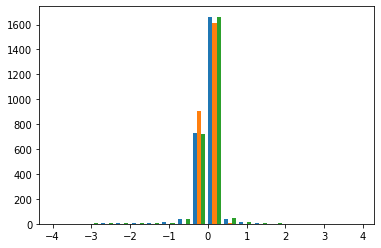

In [43]:
delta_pred = y_test_hat[:,:5] * delta_std

delta_true = y_test[:,:5] * delta_std

obs_middle = np.array([15.0, 25.0, 0.0, 0.0, 0.0])
obs_radius = np.array([15.0, 25.0, np.pi, np.pi/2, np.pi])

delta_pred = delta_pred * obs_radius
delta_true = delta_true * obs_radius

plt.hist((delta_pred-delta_true)[:,2:],20)
plt.show()

32^2
0.7568775375158716
0.6618566505493315
0.3792859472529585

32^4
0.6790337384394276
0.3706717010875441

64^2
0.7890316324251868
0.695654767820375
0.4064780202314599

64^3
0.8050472956040292
0.7231935605209159
0.379271480435488

64x128x64
0.8017002731673505
0.7189430821483473
0.37180074395282325

128^2
0.8126686933062833
0.7375201987656768
0.40055354126739673

128^4
0.8104557255909789
0.7387669853417194
0.37929269607135496

256
0.7863730904575563
0.7091571089083142
0.3982262215382181

8x256
0.7668729199385614
0.6684689377923899
0.3910761956441275

256x128
0.8116519021776541
0.7413045875383611
0.36898949926441105

128x256
0.8166583345614731
0.7493261067038156
0.3717739442587401

256^2
0.8240627820769033
0.757434327159496
0.38575411601107523

256^3
0.8145780211741683
0.7332958111739403
0.3725881872520055

512
0.7917903198840671
0.7182124929605083
0.39966753727381105

512^2
0.8153211637061869
0.7443025983927569
0.38189329807387334


In [24]:
from sklearn.neural_network import MLPClassifier
regr = MLPClassifier(hidden_layer_sizes=(256,256,256,256), 
                     activation='relu',
                     solver='adam', 
                     alpha=0.0001, 
                     batch_size='auto', 
                     learning_rate_init=0.001, 
                     max_iter=1000, shuffle=True, 
                     tol=0.0001, verbose=True, 
                     warm_start=False, momentum=0.9, 
                     nesterovs_momentum=True, early_stopping=True, 
                     validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                     epsilon=1e-08, n_iter_no_change=10, max_fun=15000,
                   )
regr = regr.fit(X_train, y_train[:,-1])

Iteration 1, loss = 0.21802560
Validation score: 0.945767
Iteration 2, loss = 0.11815929
Validation score: 0.968254
Iteration 3, loss = 0.09685636
Validation score: 0.961640
Iteration 4, loss = 0.07655394
Validation score: 0.977513
Iteration 5, loss = 0.07375277
Validation score: 0.972222
Iteration 6, loss = 0.06637748
Validation score: 0.974868
Iteration 7, loss = 0.06129107
Validation score: 0.976190
Iteration 8, loss = 0.05710522
Validation score: 0.976190
Iteration 9, loss = 0.05067833
Validation score: 0.973545
Iteration 10, loss = 0.05106279
Validation score: 0.972222
Iteration 11, loss = 0.04785663
Validation score: 0.978836
Iteration 12, loss = 0.04145392
Validation score: 0.981481
Iteration 13, loss = 0.03725076
Validation score: 0.980159
Iteration 14, loss = 0.04774019
Validation score: 0.980159
Iteration 15, loss = 0.03403206
Validation score: 0.974868
Iteration 16, loss = 0.02999306
Validation score: 0.978836
Iteration 17, loss = 0.03045393
Validation score: 0.981481
Iterat